## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

## **Load Data**

In [2]:
# Membaca dataset
df = pd.read_csv("anemia.csv")
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


## **Data Understanding**


Selanjutnya, cek informasi pada dataset dengan fungsi info()

In [3]:
# Menampilkan informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


Berdasarkan output dari df.info(), dataset terdiri atas 1.421 baris dan 6 kolom. Rincian tiap kolom adalah sebagai berikut:

- Gender: Menyatakan jenis kelamin individu, dengan 0 untuk laki-laki dan 1 untuk perempuan.

- Hemoglobin: Menunjukkan kadar hemoglobin dalam darah.

- MCH (Mean Corpuscular Hemoglobin): Menggambarkan rata-rata jumlah hemoglobin dalam satu sel darah merah.

- MCHC (Mean Corpuscular Hemoglobin Concentration): Merupakan konsentrasi rata-rata hemoglobin dalam sel darah merah.

- MCV (Mean Corpuscular Volume): Menunjukkan volume rata-rata dari sel darah merah.

- Result: Merupakan label klasifikasi, dengan 0 menandakan individu tidak mengalami anemia dan 1 menunjukkan individu menderita anemia. Kolom ini menjadi target dalam proses pelatihan model.

Semua kolom memiliki tipe data numerik, dengan 4 kolom bertipe float64 (Hemoglobin, MCH, MCHC, dan MCV) dan 2 kolom bertipe int64 (Gender dan Result). Karena seluruh fitur sudah berupa numerik, maka proses encoding tambahan tidak diperlukan untuk pelatihan model machine learning.

Selanjutnya, dilakukan pengecekan deskripsi statistik data dengan fitur describe().

In [4]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


Berdasarkan statistik deskriptif, kolom Gender dan Result menunjukkan distribusi yang cukup seimbang antara kelas 0 dan 1. Sementara itu, fitur numerik seperti Hemoglobin, MCH, MCHC, dan MCV memiliki rentang nilai dan standar deviasi yang relatif besar, mencerminkan adanya variasi signifikan antar individu. Hal ini wajar mengingat dataset mencakup kondisi fisiologis yang berbeda antara individu yang menderita anemia dan yang tidak.

Selanjutnya, kita memeriksa apakah ada missing value. 

In [5]:
# Memeriksa missing value
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

Tidak terdapat missing value untuk setiap kolom sehingga tidak diperlukan penanganan atau tindakan missing value. 

Selanjutnya, kita periksa apakah ada data yang duplikat. 

In [6]:
# Memeriksa duplikasi data
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 887


Terdapat 887 baris duplikat pada datset yang harus dihapus 

Selanjutnya, kita cek apakah ada outliers

Jumlah Outlier per Kolom:
Gender        0
Hemoglobin    1
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64


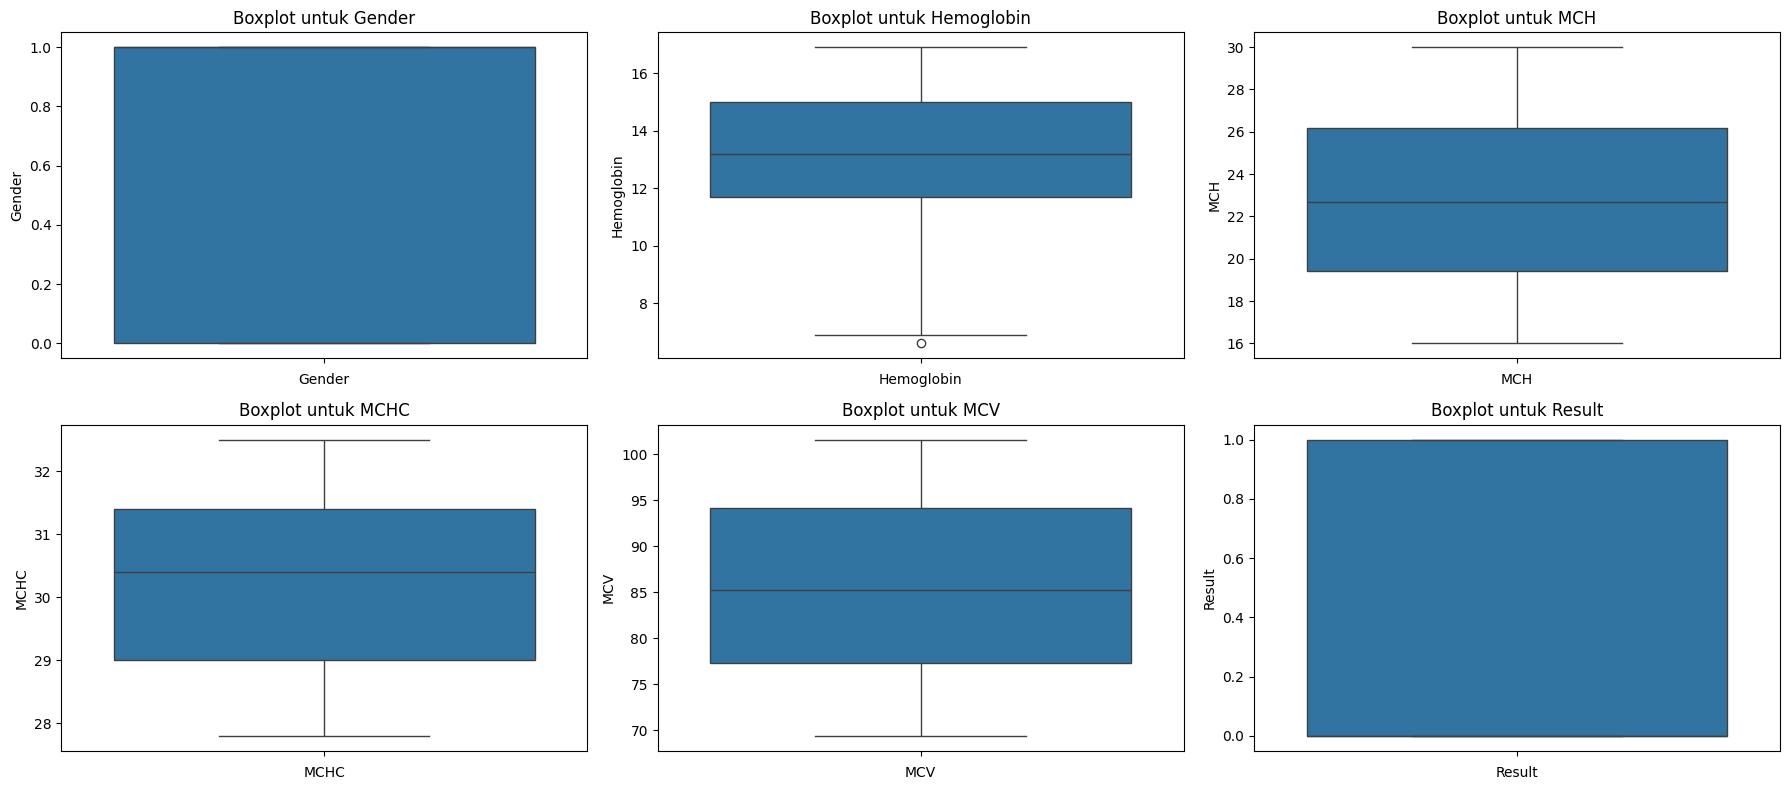

In [7]:
# Menyiapkan kolom yang akan dianalisis (semua kolom numerik)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Deteksi outlier dengan IQR
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan jumlah outlier untuk setiap kolom
outliers = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).sum()

# Menampilkan jumlah outlier per kolom
print("Jumlah Outlier per Kolom:")
print(outliers)

# Menentukan jumlah baris dan kolom untuk visualisasi (3 kolom)
n_cols = 3
n_rows = (len(numeric_columns) // n_cols) + (len(numeric_columns) % n_cols > 0)  # Menyesuaikan jumlah baris

# Set canvas ukuran untuk visualisasi
plt.figure(figsize=(n_cols * 6, n_rows * 4))  # Menyesuaikan ukuran figure

# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Membuat grid dengan jumlah baris dan kolom yang disesuaikan
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot untuk {col}")
    plt.xlabel(col)

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan gambar:

- Jumlah outlier hanya ditemukan pada kolom Hemoglobin (sebanyak 1 outlier).

- Kolom lain seperti Gender, MCH, MCHC, MCV, dan Result tidak memiliki outlier.

- Visualisasi boxplot juga mengonfirmasi hal ini, terlihat hanya Hemoglobin yang memiliki titik data di luar batas normal (outlier), sedangkan boxplot lainnya bersih dari pencilan.

Singkatnya: Data bersih dari outlier kecuali pada kolom Hemoglobin.

## **Exploratory Data Analysis**

Selanjutnya, kita akan melakukan proses analisis data dengan teknik Univariate, Bivariate, dan Multivariate Analysis.

### **Univariate Analysis**

In [8]:
# Mengubah nilai di DataFrame untuk Gender dan Result menjadi kategorikal
df['Gender'] = df['Gender'].replace({0: 'Male', 1: 'Female'})
df['Result'] = df['Result'].replace({0: 'Not Anemic', 1: 'Anemic'})

Kita akan melakukan analisis terrhadap fitur kategorikal terlebih dahulu. 

### **Analisis Distribusi Data Kategorikal**

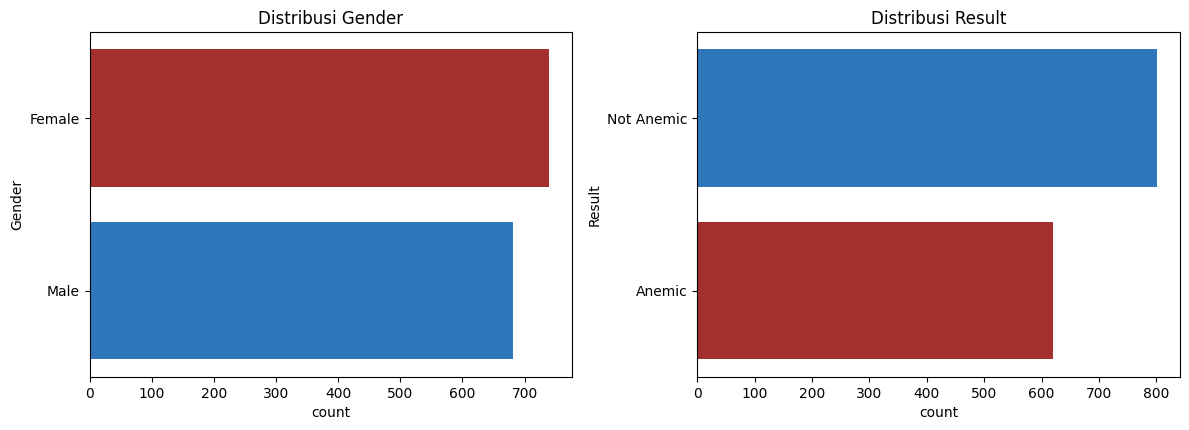

In [9]:
# Pilih kolom kategorikal yang akan dianalisis
categorical_columns = ['Gender', 'Result']

# Set plot size
plt.figure(figsize=(12, 8))

# Buat bar plot horizontal untuk setiap variabel kategorikal
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    if col == 'Gender':
        # Plot untuk Gender dengan warna yang berbeda
        sns.countplot(data=df, y=col, palette=['#B71C1C', '#1976D2'], order=df[col].value_counts().index, hue='Gender')
    else:
        # Plot untuk Result dengan warna yang berbeda
        sns.countplot(data=df, y=col, palette=['#1976D2', '#B71C1C'], order=df[col].value_counts().index, hue='Result')

    plt.title(f"Distribusi {col}")

# Menampilkan plot
plt.tight_layout()
plt.show()

Distribusi Gender menunjukkan bahwa jumlah individu berjenis kelamin Female sedikit lebih banyak dibandingkan dengan Male.
Sementara itu, distribusi Result memperlihatkan bahwa jumlah individu dengan kategori Not Anemic lebih tinggi dibandingkan dengan yang Anemic, yang berarti mayoritas data terdiri dari individu yang tidak menderita anemia.

Selanjutnya, lakukan analisis terhadap data numerik. 

### **Analisis Distribusi Data Numerik**

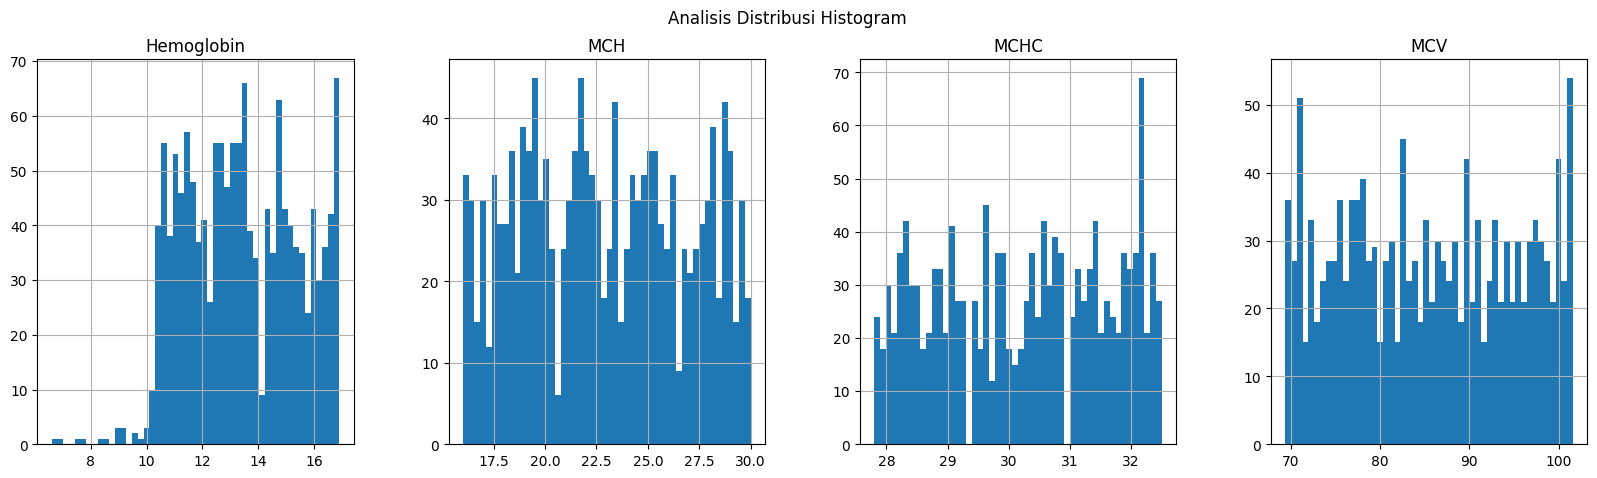

In [10]:
# Menyiapkan kolom yang akan dianalisis
colhist = df.iloc[:, 1:5]  # Kolom dari Hemoglobin, MCH, MCHC, MCV

# Membuat histogram untuk masing-masing kolom dengan menggunakan .hist() dari pandas
colhist.hist(bins=50, figsize=(20, 5), layout=(1, 4))

# Menambahkan judul utama
plt.suptitle("Analisis Distribusi Histogram")

# Menampilkan plot
plt.show()

Berdasarkan gambar histogram distribusi:

- Hemoglobin menunjukkan distribusi yang cukup tersebar dengan beberapa nilai rendah yang cukup menonjol (kemungkinan outlier).

- MCH, MCHC, dan MCV memiliki distribusi yang relatif merata tanpa puncak yang ekstrem, menandakan tidak adanya dominasi nilai tertentu.

- Tidak terdapat pola distribusi yang mencolok (seperti distribusi normal), menunjukkan bahwa data cenderung tersebar secara acak di setiap variabel.

Singkatnya: Keempat variabel memiliki sebaran data yang variatif, dengan Hemoglobin menunjukkan potensi outlier.

### **Bivariate Analysis**

Selanjutnya, kita akan menganalisis hubungan antara fitur-fitur terhadap fitur target (Result) 

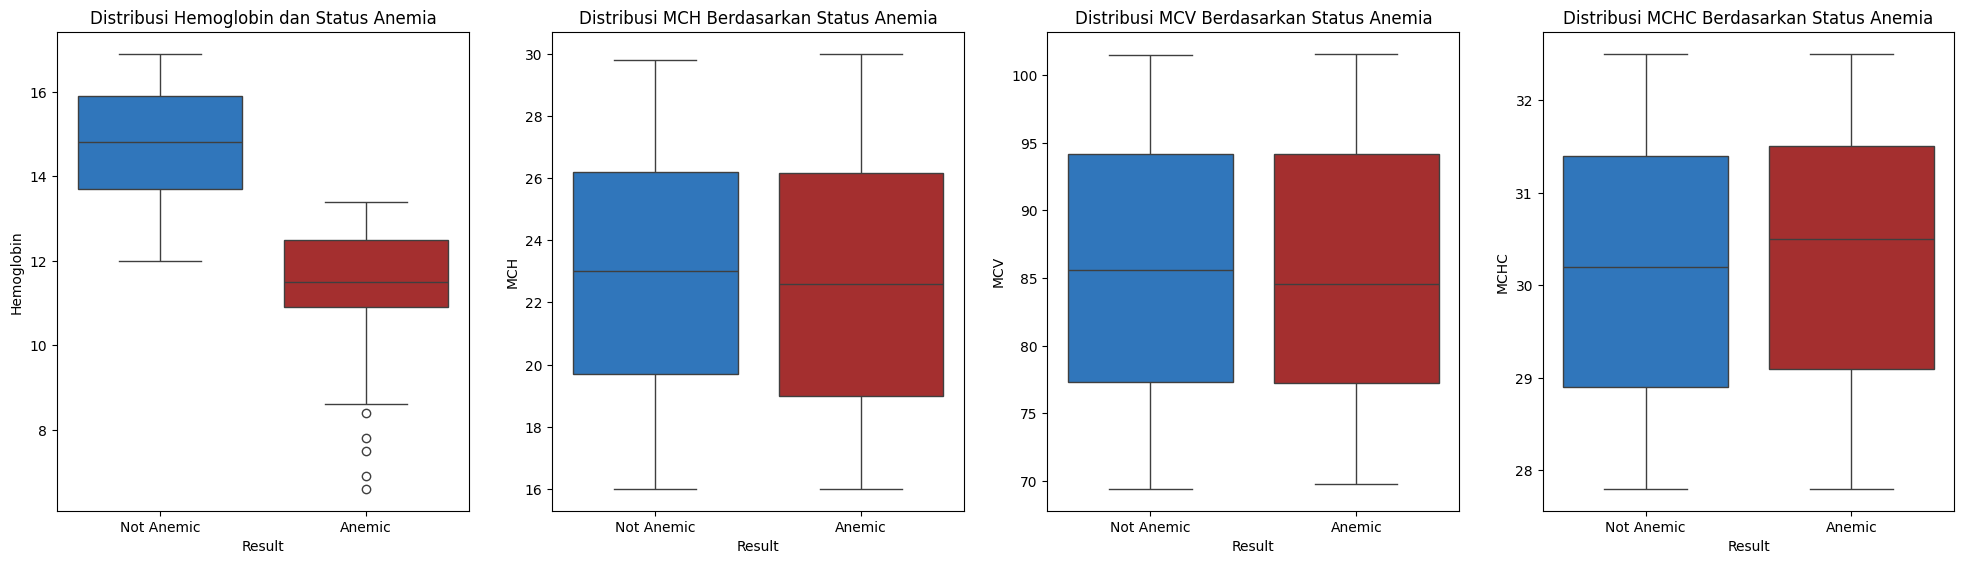

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set ukuran canvas untuk 1 baris, 4 kolom, 4 plot
plt.figure(figsize=(20, 6))

# Plot untuk Hemoglobin
plt.subplot(1, 4, 1)  # 1 baris, 4 kolom, plot pertama
sns.boxplot(data=df, x='Result', y='Hemoglobin', hue='Result', palette={'Not Anemic': '#1976D2', 'Anemic': '#B71C1C'})
plt.title('Distribusi Hemoglobin dan Status Anemia')
plt.xlabel('Result')
plt.ylabel('Hemoglobin')

# Plot untuk MCH
plt.subplot(1, 4, 2)  # 1 baris, 4 kolom, plot kedua
sns.boxplot(data=df, x='Result', y='MCH', hue='Result', palette={'Not Anemic': '#1976D2', 'Anemic': '#B71C1C'})
plt.title('Distribusi MCH Berdasarkan Status Anemia')
plt.xlabel('Result')
plt.ylabel('MCH')

# Plot untuk MCV
plt.subplot(1, 4, 3)  # 1 baris, 4 kolom, plot ketiga
sns.boxplot(data=df, x='Result', y='MCV', hue='Result', palette={'Not Anemic': '#1976D2', 'Anemic': '#B71C1C'})
plt.title('Distribusi MCV Berdasarkan Status Anemia')
plt.xlabel('Result')
plt.ylabel('MCV')

# Plot untuk MCHC
plt.subplot(1, 4, 4)  # 1 baris, 4 kolom, plot keempat
sns.boxplot(data=df, x='Result', y='MCHC', hue='Result', palette={'Not Anemic': '#1976D2', 'Anemic': '#B71C1C'})
plt.title('Distribusi MCHC Berdasarkan Status Anemia')
plt.xlabel('Result')
plt.ylabel('MCHC')

# Menyesuaikan layout
plt.tight_layout(pad=2.0)  # Adjust padding between subplots
plt.show()

Dapat dilihat bahwa individu dengan status Anemia memiliki kadar Hemoglobin yang secara signifikan lebih rendah dibandingkan dengan individu yang tidak anemia.
Sementara itu, variabel MCH, MCV, dan MCHC hanya menunjukkan perbedaan kecil antar kedua kelompok, yang mengindikasikan bahwa Hemoglobin merupakan indikator yang paling mencolok dalam membedakan status anemia.

### **Multivariate Analysis**

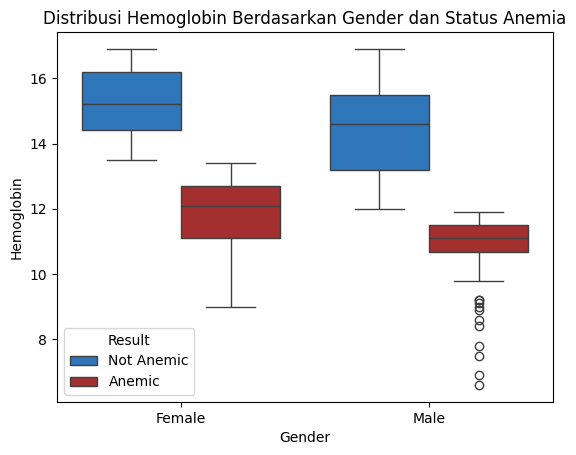

In [12]:
sns.boxplot(data=df, x='Gender', y='Hemoglobin', hue='Result', palette={'Not Anemic': '#1976D2', 'Anemic': '#B71C1C'})
plt.title('Distribusi Hemoglobin Berdasarkan Gender dan Status Anemia')
plt.show()

Perempuan yang menderita anemia (ditandai dengan kotak merah)memiliki kadar hemoglobin lebih rendah dibandingkan laki-laki anemia. Sebaliknya, perempuan yang tidak anemia (ditandai dengan kotak biru) menunjukkan kadar hemoglobin lebih tinggi dibandingkan laki-laki tidak anemia.

### **Analisis Korelasi**

In [13]:
# Ganti nilai pada kolom dengan memetakan kategori menjadi numerik kembali (kembali ke data awal)
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1}).astype(int)
df['Result'] = df['Result'].replace({'Not Anemic': 0, 'Anemic': 1}).astype(int)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_44372\3654677537.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1}).astype(int)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_44372\3654677537.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Result'] = df['Result'].replace({'Not Anemic': 0, 'Anemic': 1}).astype(int)


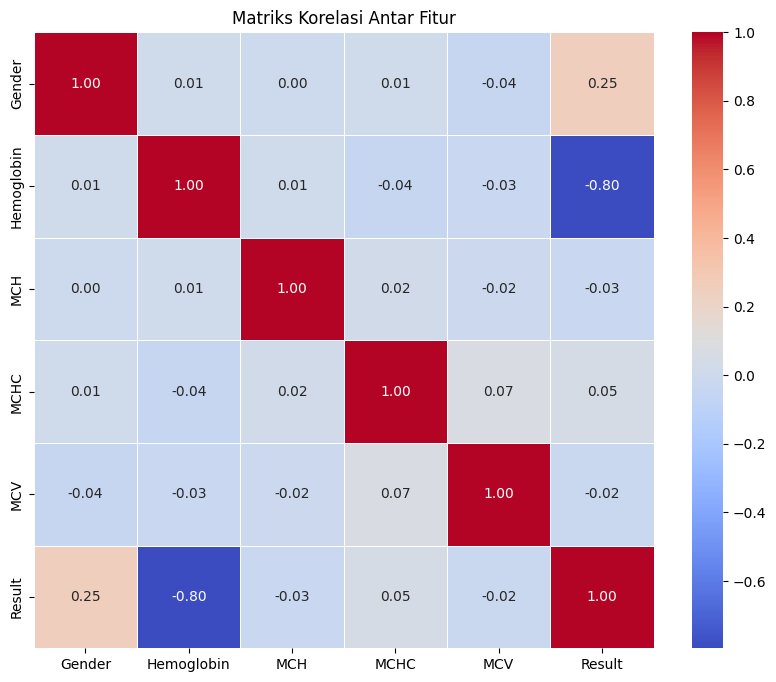

In [14]:
# Menghitung matriks korelasi antar fitur numerik pada DataFrame
correlation_matrix = df.corr()

# Visualisasi heatmap matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Menambahkan judul pada heatmap
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

Hemoglobin memiliki korelasi negatif yang kuat dengan Result (-0.80), menandakan kadar hemoglobin rendah berkaitan erat dengan anemia. Gender menunjukkan korelasi lemah (0.25), sedangkan MCH, MCHC, dan MCV hampir tidak berkorelasi dengan Result. Semua fitur tetap digunakan karena jumlah data terbatas.

## **Data Preprocessing**

### **Penghapusan Data Duplikat**

Berdasarkan hasil dari Data Understanding dan EDA, didapatkan bahwa terdapat 887 baris duplikat yang harus dihapus. 

In [15]:
# Menghapus baris duplikat
df = df.drop_duplicates()
# Memeriksa jumlah baris setelah duplikasi dihapus
print(f"Jumlah baris setelah penghapusan duplikat: {df.shape[0]}")

Jumlah baris setelah penghapusan duplikat: 534


### **Split Dataset**

Membagi dataset menjadi data latih (train) dan data uji (test).

In [16]:
X = df.drop(columns=['Result'])
y = df['Result'].astype(int)

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah data pada masing-masing set
print("Jumlah data pada X_train:", X_train.shape[0])
print("Jumlah data pada X_test:", X_test.shape[0])
print("Jumlah data pada y_train:", y_train.shape[0])
print("Jumlah data pada y_test:", y_test.shape[0])

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print("\nDistribusi kelas pada data pelatihan:\n", y_train.value_counts())
print("\nDistribusi kelas pada data uji:\n", y_test.value_counts())

Jumlah data pada X_train: 427
Jumlah data pada X_test: 107
Jumlah data pada y_train: 427
Jumlah data pada y_test: 107

Distribusi kelas pada data pelatihan:
 Result
0    229
1    198
Name: count, dtype: int64

Distribusi kelas pada data uji:
 Result
0    58
1    49
Name: count, dtype: int64


Data dibagi menjadi 80% pelatihan (427 data) dan 20% pengujian (107 data) dengan distribusi kelas yang seimbang. Pada data pelatihan, terdapat 229 individu tidak anemia dan 198 anemia. Di data uji, 58 tidak anemia dan 49 anemia. Ini memastikan representasi kelas tetap konsisten pada kedua set.

### **Penanganan Imbalance Class**

Pada EDA, diketahui terdapat ketidakseimbangan kelas antara Anemic dan Not Anemic. Oleh karena itu, dilakukan penanganan untuk menyeimbangkan kelas menggunakan SMOTE.

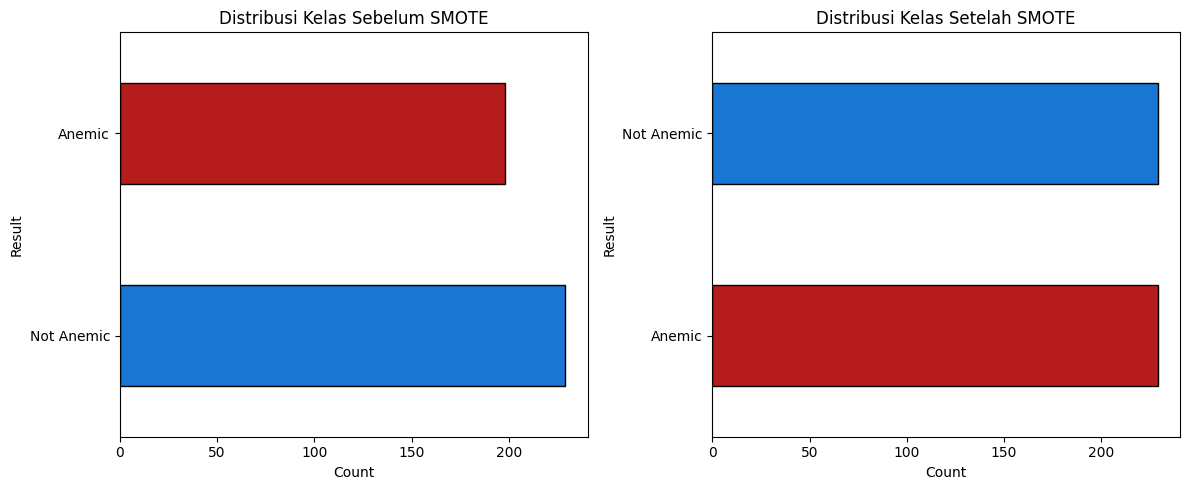

In [17]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Penanganan imbalance class dengan SMOTE (hanya di training set)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Mengganti label angka dengan kategori
y_train_labels = y_train.map({0: 'Not Anemic', 1: 'Anemic'})
y_train_resampled_labels = y_train_resampled.map({0: 'Not Anemic', 1: 'Anemic'})

# Plot distribusi kelas sebelum SMOTE
plt.figure(figsize=(12, 5))

# Plot pertama untuk sebelum SMOTE
plt.subplot(1, 2, 1)
y_train_labels.value_counts().plot.barh(color=['#1976D2', '#B71C1C'], edgecolor='black')
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Count')
plt.ylabel('Result')

# Plot kedua untuk setelah SMOTE
plt.subplot(1, 2, 2)
y_train_resampled_labels.value_counts().plot.barh(color=['#B71C1C', '#1976D2'], edgecolor='black')
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Count')
plt.ylabel('Result')

# Menampilkan plot
plt.tight_layout()
plt.show()

Setelah dilakukan SMOTE, dapat terlihat data antara anemic dan not anemic menjadi seimbang.

### **Standarisasi**

Pada tahap ini, dilakukan standarisasi pada data X_train_resampled menggunakan StandardScaler. Proses ini memastikan bahwa setiap fitur dalam data memiliki distribusi dengan rata-rata 0 dan standar deviasi 1.

In [18]:
# Standarisasi data (hanya di training set)
scaler = StandardScaler()

# Fit dan transform data pelatihan
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform data uji menggunakan scaler yang sama
X_test_scaled = scaler.transform(X_test)

# Menampilkan contoh data setelah standarisasi
print("Contoh data X_train setelah standarisasi:\n", X_train_scaled[:5])

Contoh data X_train setelah standarisasi:
 [[ 0.99130418 -0.33298437  0.59832174  0.8724921   0.63036238]
 [-1.0087721  -1.39349073 -0.71413695 -1.4734584   0.07072945]
 [ 0.99130418  0.29367849 -0.50826108  0.65922388  1.22108603]
 [ 0.99130418 -0.81503272 -0.37958866 -1.11801135  1.3454489 ]
 [ 0.99130418  0.8721365  -0.30238521  0.23268742  0.45418164]]


Hasil standarisasi pada data X_train menunjukkan bahwa semua fitur kini berada dalam skala yang relatif seragam, dengan nilai yang terpusat di sekitar 0 dan memiliki variansi mendekati 1. Proses ini sangat penting, terutama untuk algoritma seperti **K-Nearest Neighbors (KNN)** yang peka terhadap perbedaan skala antar fitur, agar model tidak bias terhadap fitur dengan nilai numerik yang lebih besar.

Setelah melewati tahap data preparation, data siap untuk digunakan dalam pembangunan model. 

## **Pembangunan Model**

### **Membangun Model Klarifikasi**

Setiap algoritma klasifikasi dilatih secara terpisah menggunakan data pelatihan. Model RandomForestClassifier, DecisionTreeClassifier, LogisticRegression, KNeighborsClassifier, dikonfigurasi dan dilatih sesuai dengan dataset yang tersedia.

In [19]:
rf = RandomForestClassifier().fit(X_train_scaled, y_train_resampled)
dt = DecisionTreeClassifier().fit(X_train_scaled, y_train_resampled)
lr = LogisticRegression().fit(X_train_scaled, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_scaled, y_train_resampled)
print("Model training selesai.")

Model training selesai.


Setelah proses pelatihan berakhir, model-model tersebut siap dievaluasi dengan data uji. Notifikasi "Model training selesai." mengindikasikan bahwa semua model telah berhasil melewati fase pelatihan dan siap untuk penilaian.

### **Evaluasi Model Klasifikasi**

Kali ini, kita akan melakukan evaluasi awal modelsebelum yperparameter tuning.

In [20]:
# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  # Confusion matrix

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Classification Report': classification_report(y_test, y_pred)
    }

    # Plot Confusion Matrix
    plot_confusion_matrix(cm, model_name)

    return results

# Fungsi untuk menampilkan Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Model: Random Forest (RF)


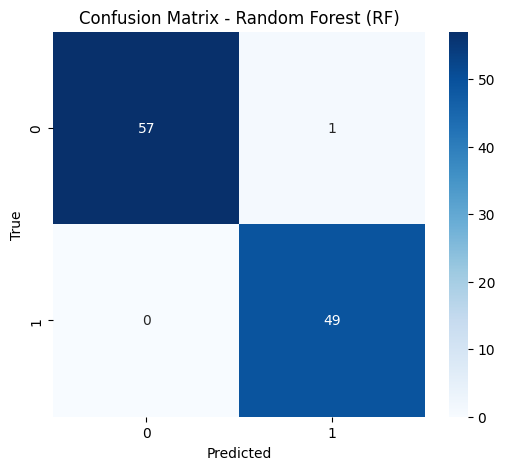

Accuracy: 0.9907
Precision: 0.9908
Recall: 0.9907
F1-Score: 0.9907

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.98      1.00      0.99        49

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107


Model: Decision Tree (DT)


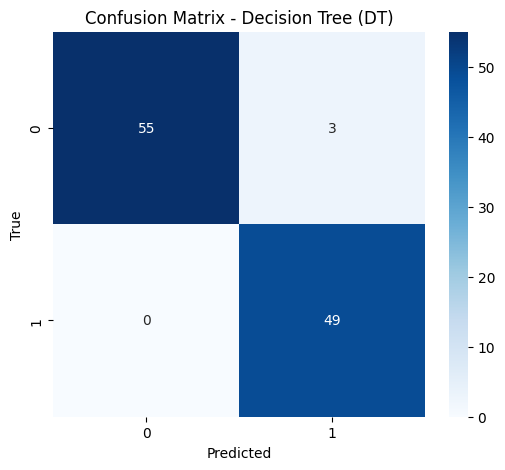

Accuracy: 0.9720
Precision: 0.9736
Recall: 0.9720
F1-Score: 0.9720

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.94      1.00      0.97        49

    accuracy                           0.97       107
   macro avg       0.97      0.97      0.97       107
weighted avg       0.97      0.97      0.97       107


Model: Logistic Regression (LR)


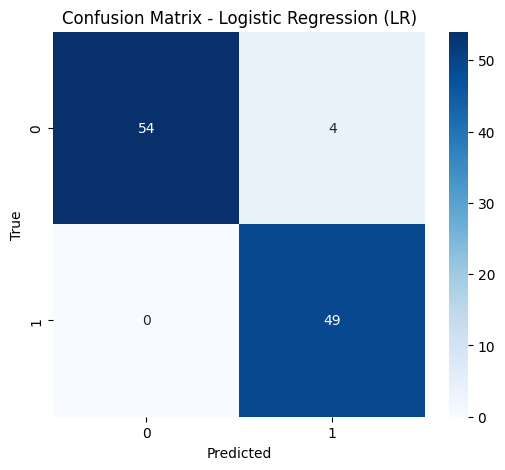

Accuracy: 0.9626
Precision: 0.9654
Recall: 0.9626
F1-Score: 0.9627

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        58
           1       0.92      1.00      0.96        49

    accuracy                           0.96       107
   macro avg       0.96      0.97      0.96       107
weighted avg       0.97      0.96      0.96       107


Model: K-Nearest Neighbors (KNN)


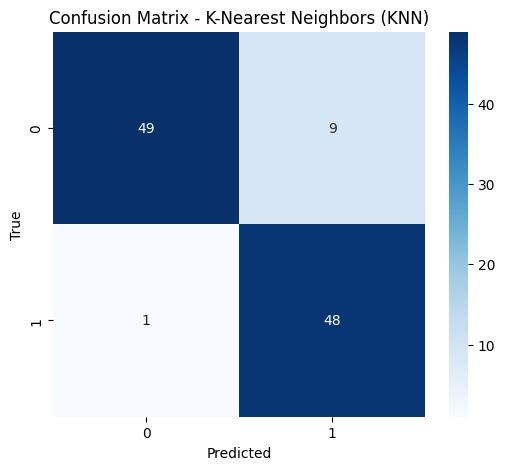

Accuracy: 0.9065
Precision: 0.9169
Recall: 0.9065
F1-Score: 0.9066

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91        58
           1       0.84      0.98      0.91        49

    accuracy                           0.91       107
   macro avg       0.91      0.91      0.91       107
weighted avg       0.92      0.91      0.91       107

                       Model  Accuracy  Precision    Recall  F1-Score
0         Random Forest (RF)  0.990654   0.990841  0.990654  0.990661
1         Decision Tree (DT)  0.971963   0.973580  0.971963  0.972007
2   Logistic Regression (LR)  0.962617   0.965438  0.962617  0.962682
3  K-Nearest Neighbors (KNN)  0.906542   0.916852  0.906542  0.906607


In [21]:
# Model yang akan diuji
models = {
    'Random Forest (RF)': rf,
    'Decision Tree (DT)': dt,
    'Logistic Regression (LR)': lr,
    'K-Nearest Neighbors (KNN)': knn,
}

# Inisialisasi dictionary hasil evaluasi
results = {}

# Evaluasi semua model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    results[model_name] = evaluate_model(model, X_test_scaled, y_test, model_name)
    print(f"Accuracy: {results[model_name]['Accuracy']:.4f}")
    print(f"Precision: {results[model_name]['Precision']:.4f}")
    print(f"Recall: {results[model_name]['Recall']:.4f}")
    print(f"F1-Score: {results[model_name]['F1-Score']:.4f}")
    print("\nClassification Report:")
    print(results[model_name]['Classification Report'])
    print("="*60)

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil evaluasi
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar hasil ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan hasil ringkasan
print(summary_df)

Berdasarkan hasil evaluasi, model Random Forest menunjukkan performa paling unggul dengan hanya satu kesalahan dari total 107 data, menjadikannya sangat andal untuk mendeteksi kondisi anemia dengan risiko prediksi yang sangat rendah. Model Decision Tree juga memberikan performa sangat baik dengan akurasi 97,2%, mampu membedakan kedua kelas secara efektif. Namun, dibandingkan Random Forest, model ini sedikit lebih lemah dalam recall untuk kelas 0, sehingga bisa berdampak dalam aplikasi yang sensitif terhadap kesalahan negatif. Model Logistic Regression tampil solid dengan akurasi tinggi dan keseimbangan kesalahan yang minimal. Model ini berhasil mendeteksi seluruh kasus positif tanpa kesalahan (tidak ada False Negative), meskipun terdapat beberapa False Positive. Hal ini membuat Logistic Regression sangat cocok untuk situasi di mana pencegahan terhadap kesalahan melewatkan kasus positif menjadi prioritas utama. Sementara itu, model K-Nearest Neighbors (KNN) cukup stabil dan akurat, unggul dalam mendeteksi kelas positif (recall 0,98) namun sedikit rentan terhadap False Positive. Model ini cocok digunakan jika lebih penting untuk tidak melewatkan kasus positif, meskipun ada sedikit kompromi pada precision. Secara keseluruhan, Random Forest menjadi pilihan terbaik, disusul Logistic Regression untuk alternatif yang ringan dan aman dalam deteksi positif, sementara Decision Tree dan KNN tetap layak dipertimbangkan sesuai konteks kebutuhan aplikasi.


### **Tuning Model Klasifikasi**

Menggunakan GridSearchCV untuk mencari kombinasi parameter terbaik untuk setiap model dan menyimpannya.

#### **Random Forest**

In [22]:
# Menyiapkan parameter grid untuk tuning RF
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Menyiapkan GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)

# Melakukan fitting GridSearchCV
grid_rf.fit(X_train_scaled, y_train_resampled)

# Menampilkan hasil terbaik
print("Best Params for Random Forest:", grid_rf.best_params_)

# Mendapatkan model terbaik
best_rf = grid_rf.best_estimator_

Best Params for Random Forest: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}


#### **Desicion Tree**

In [23]:
# Menyiapkan parameter grid untuk tuning DT
param_grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Menyiapkan GridSearchCV
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)

# Melakukan fitting GridSearchCV
grid_dt.fit(X_train_scaled, y_train_resampled)

# Menampilkan hasil terbaik
print("Best Params for Decision Tree:", grid_dt.best_params_)

# Mendapatkan model terbaik
best_dt = grid_dt.best_estimator_

Best Params for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}


#### **Logistic Regression**

In [24]:
# Menyiapkan parameter grid untuk tuning LR
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1],
    'solver': ['liblinear', 'saga'],
}

# Menyiapkan GridSearchCV
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)

# Melakukan fitting GridSearchCV
grid_lr.fit(X_train_scaled, y_train_resampled)

# Menampilkan hasil terbaik
print(f"Best params for Logistic Regression:", grid_lr.best_params_)

# Mendapatkan model terbaik
best_lr = grid_lr.best_estimator_

Best params for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


#### **K-Nearest Neighbors**

In [25]:
# Menyiapkan parameter grid untuk tuning KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Menyiapkan GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

# Melakukan fitting GridSearchCV
grid_knn.fit(X_train_scaled, y_train_resampled)

# Menampilkan hasil terbaik
print("Best Params for KNN:", grid_knn.best_params_)

# Mendapatkan model terbaik
best_knn = grid_knn.best_estimator_

Best Params for KNN: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


In [26]:
# Menyusun hasil terbaik dalam bentuk summary
results_summary = {
    'Random Forest (RF)': grid_rf.best_params_,
    'Decision Tree (DT)': grid_dt.best_params_,
    'Logistic Regression (LR)': grid_lr.best_params_,
    'K-Nearest Neighbors (KNN)': grid_knn.best_params_
}

# Menampilkan summary hasil best parameters
print("Summary of Best Parameters for Each Model:")
for model_name, best_params in results_summary.items():
    print(f"\n{model_name}:")
    for param, value in best_params.items():
        print(f"  {param}: {value}")

Summary of Best Parameters for Each Model:

Random Forest (RF):
  max_depth: 5
  min_samples_split: 10
  n_estimators: 50

Decision Tree (DT):
  criterion: gini
  max_depth: 5
  min_samples_split: 5

Logistic Regression (LR):
  C: 1
  penalty: l1
  solver: saga

K-Nearest Neighbors (KNN):
  metric: euclidean
  n_neighbors: 5
  weights: uniform


### **Evaluasi Model Klasifikasi Setelah Tuning**

Setelah menemukan kombinasi parameter terbaik, model dievaluasi ulang untuk melihat perbandingan performa.


Model: Random Forest (RF)


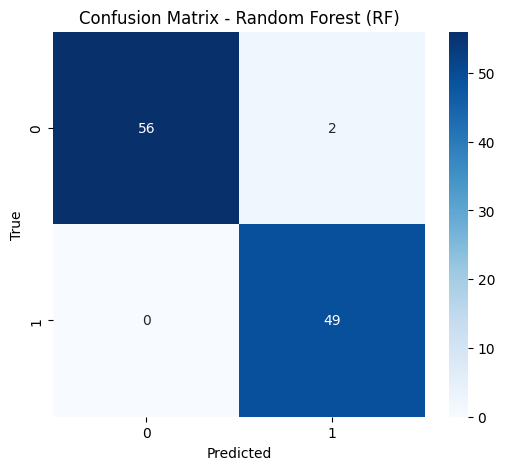

Accuracy: 0.9813
Precision: 0.9820
Recall: 0.9813
F1-Score: 0.9813

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.96      1.00      0.98        49

    accuracy                           0.98       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.98      0.98      0.98       107


Model: Decision Tree (DT)


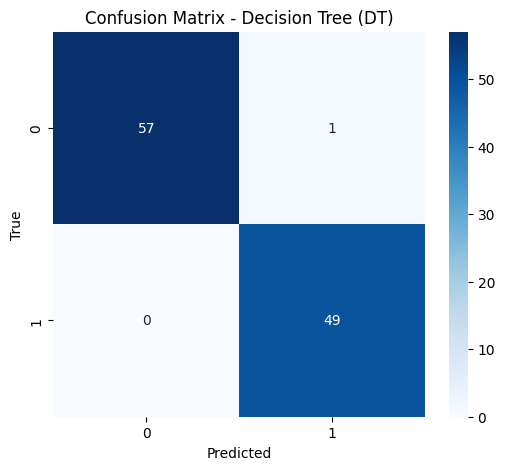

Accuracy: 0.9907
Precision: 0.9908
Recall: 0.9907
F1-Score: 0.9907

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.98      1.00      0.99        49

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107


Model: Logistic Regression (LR)


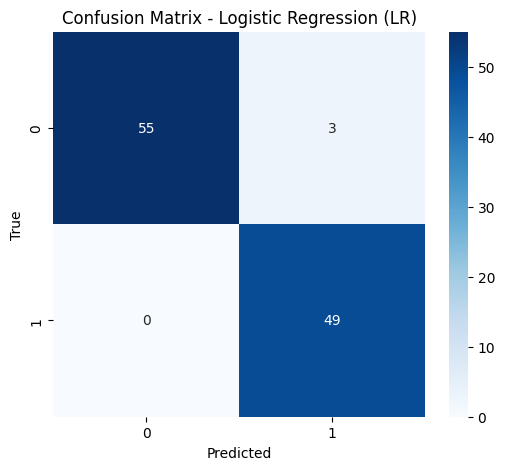

Accuracy: 0.9720
Precision: 0.9736
Recall: 0.9720
F1-Score: 0.9720

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.94      1.00      0.97        49

    accuracy                           0.97       107
   macro avg       0.97      0.97      0.97       107
weighted avg       0.97      0.97      0.97       107


Model: K-Nearest Neighbors (KNN)


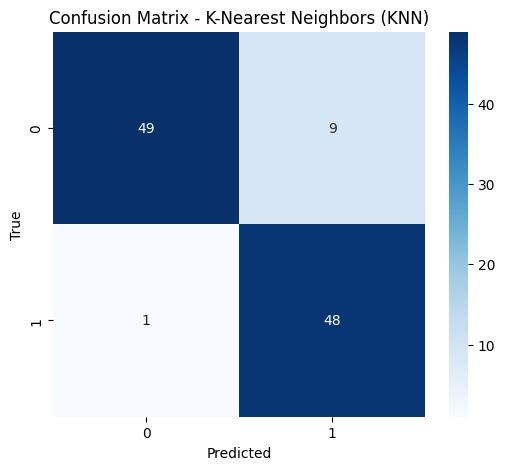

Accuracy: 0.9065
Precision: 0.9169
Recall: 0.9065
F1-Score: 0.9066

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91        58
           1       0.84      0.98      0.91        49

    accuracy                           0.91       107
   macro avg       0.91      0.91      0.91       107
weighted avg       0.92      0.91      0.91       107

                       Model  Accuracy  Precision    Recall  F1-Score
0         Random Forest (RF)  0.981308   0.982041  0.981308  0.981331
1         Decision Tree (DT)  0.990654   0.990841  0.990654  0.990661
2   Logistic Regression (LR)  0.971963   0.973580  0.971963  0.972007
3  K-Nearest Neighbors (KNN)  0.906542   0.916852  0.906542  0.906607


In [27]:
# Model yang akan diuji
models = {
    'Random Forest (RF)': best_rf,
    'Decision Tree (DT)': best_dt,
    'Logistic Regression (LR)': best_lr,
    'K-Nearest Neighbors (KNN)': best_knn,
}

# Inisialisasi dictionary hasil evaluasi
results_after_tuning = {}

# Evaluasi semua model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    results_after_tuning[model_name] = evaluate_model(model, X_test_scaled, y_test, model_name)
    print(f"Accuracy: {results_after_tuning[model_name]['Accuracy']:.4f}")
    print(f"Precision: {results_after_tuning[model_name]['Precision']:.4f}")
    print(f"Recall: {results_after_tuning[model_name]['Recall']:.4f}")
    print(f"F1-Score: {results_after_tuning[model_name]['F1-Score']:.4f}")
    print("\nClassification Report:")
    print(results_after_tuning[model_name]['Classification Report'])
    print("="*60)

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil evaluasi
rows = []
for model_name, metrics in results_after_tuning.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar hasil ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan hasil ringkasan
print(summary_df)

Random Forest dan Decision Tree tampil sebagai model terbaik dengan performa nyaris sempurna di semua metrik. Logistic Regression tetap jadi opsi yang sangat baik, khususnya bila ingin model yang lebih ringan dengan performa tetap stabil. Sementara itu, KNN meskipun sedikit di bawah, masih layak dipertimbangkan di kondisi tertentu, apalagi kalau recall terhadap kelas positif menjadi prioritas.

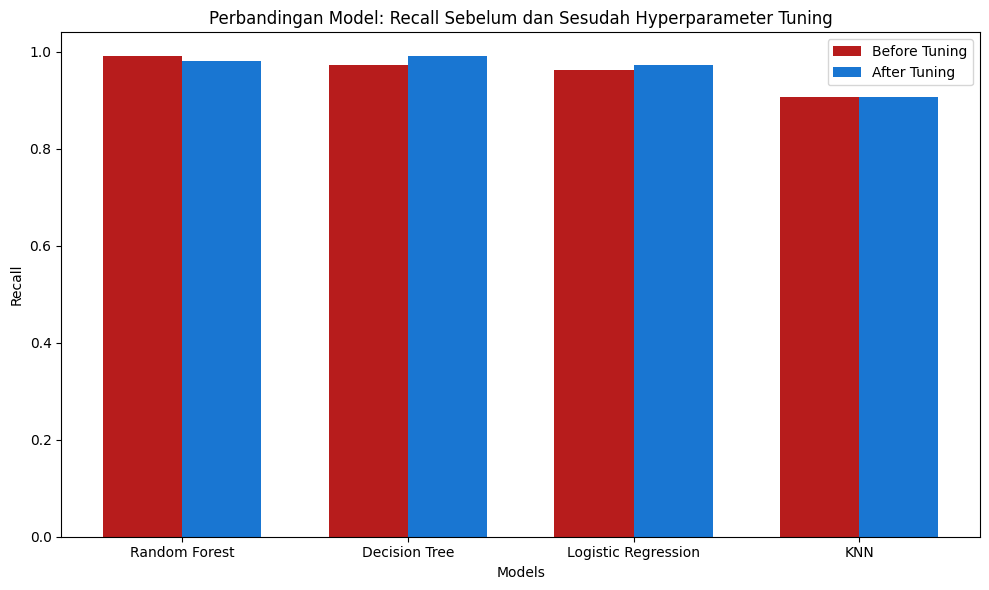

In [28]:
import matplotlib.pyplot as plt

# Hasil evaluasi Recall sebelum tuning
before_tuning_recall = [
    results['Random Forest (RF)']['Recall'],
    results['Decision Tree (DT)']['Recall'],
    results['Logistic Regression (LR)']['Recall'],
    results['K-Nearest Neighbors (KNN)']['Recall']
]

# Hasil evaluasi Recall setelah tuning
after_tuning_recall = [
    results_after_tuning['Random Forest (RF)']['Recall'],
    results_after_tuning['Decision Tree (DT)']['Recall'],
    results_after_tuning['Logistic Regression (LR)']['Recall'],
    results_after_tuning['K-Nearest Neighbors (KNN)']['Recall']
]

# Model names
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN']

# Membuat grafik batang untuk perbandingan Recall
x = range(len(models))
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Plot sebelum tuning
ax.bar(x, before_tuning_recall, bar_width, label='Before Tuning', color='#B71C1C')

# Plot setelah tuning
ax.bar([p + bar_width for p in x], after_tuning_recall, bar_width, label='After Tuning', color='#1976D2')

# Menambahkan judul dan label
ax.set_title('Perbandingan Model: Recall Sebelum dan Sesudah Hyperparameter Tuning')
ax.set_xlabel('Models')
ax.set_ylabel('Recall')
ax.set_xticks([p + bar_width/2 for p in x])
ax.set_xticklabels(models)

# Menambahkan legenda
ax.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

Dari grafik terlihat bahwa ada **sedikit peningkatan hasil evaluasi Recall setelah dilakukan hyperparameter tuning**, khususnya pada **Decision Tree** dan **Logistic Regression**, yang Recall-nya naik cukup signifikan dibanding sebelum tuning. **Random Forest** tetap mempertahankan performa Recall yang sangat tinggi, stabil di atas 0.99 baik sebelum maupun sesudah tuning, menjadikannya model paling unggul secara konsisten.

Sementara itu, **K-Nearest Neighbors (KNN)** menunjukkan peningkatan yang lebih kecil dibanding model lain, namun tetap mengalami perbaikan Recall setelah tuning.

Secara keseluruhan, **Random Forest tetap menjadi model yang paling disarankan setelah tuning**, diikuti oleh **Decision Tree**, dengan **Logistic Regression** dan **KNN** lebih cocok digunakan pada skenario yang lebih sederhana. Dalam konteks diagnosis medis seperti pendeteksian anemia, **Recall yang tinggi sangat penting untuk memastikan semua pasien yang berpotensi menderita anemia dapat terdeteksi**, meminimalkan risiko false negatives yang bisa berakibat fatal karena pasien tidak menerima penanganan yang semestinya.